<a href="https://colab.research.google.com/github/Ernestug/30Days-of-Learning-Data-Analysis-Using-Power-BI-for-Students/blob/main/Case_study_1_Iris_species(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first phase in any data science or analytics project is the exploratory data analysis. In this phase, the analyst tries to understand the nature of the data, the distribution, and relationships. For this, he or she can use different methods provided by pandas as well as visualisations provided by matplotlib or seaborn.

The main information to look for is:

* Data dimensionality, name of features, and types of features
* Statistical summaries for numerical features
* Repartitions of categorical and boolean features
* Missing data
* Equilibrium in repartition or distribution of target features

With visualisations, we can check rapidly for:
* Nature of distribution of individual features (e.g. normal or skewed)
* Anomalies (using, e.g. boxplot)
* Bivariate correlations
* ...

# Import pandas, matplotlib and seaborn, and load the iris dataset

* Load an example dataset from the online repository (requires internet).

* The method load_dataset provides quick access to a small number of example datasets that are useful for documenting seaborn or generating reproducible examples for bug reports. You can check the documentation of this method here:

 https://seaborn.pydata.org/generated/seaborn.load_dataset.html

* There are many datasets that you can practice with other than iris. You can check the list of the datasets and their names at:
 https://github.com/mwaskom/seaborn-data).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Let's first load the data , and take a look at the first 10 lines using the head method:

Each row is decribed only one observation (one flower).

Each column describes one feature of the observations (e.g. the lengt of the sepal of the flower)

In [ ]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Let’s have a look at data dimensionality, feature names, and feature types:

Actually, these are the very first things you should check with any dataset!

In [ ]:
print("Shape of the dataset: {}".format(iris.shape))

Shape of the dataset: (150, 5)


In [ ]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

We can use the info() method to output some general information about the dataframe. In particular, we can see whether there are missing values. Missing values should be treated before doing further analysis. You'll see different strategies on treating missing data as we advance with the data analytics course. However, if you are super excited about it already, you can check this article for example:

https://machinelearningmastery.com/handle-missing-data-python/


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* The datatypes of our fetaures are float64 (numeric) and object.

* Here, there are none because each column contains 150 observations, the same number of rows we saw before with shape.

* The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

* As a reminder, the variable or features types are the following:

  * Nominal: names, gender... Variables that have not really an intrinsic numerical value. Categories are nominal variables.

  * Ordinal: scales, education degrees... Numerical variables that have order but they do not display proportions (e.g. very good does not necessarily mean that it is the double of good but simply that it is in a higher position).

  * Discrete (int): number of chairs in a room, days in the calendar... Natural numbers (i.e. with no decimals, e.g. 0, 4, 129, -12). Attention: ordinal variables can be coded using strings or using numbers. So if a variable is coded for example using 1, 2, 3, 4, ..., it doesn't automatically mean that it is a discrete or integer variable. It might be an ordinal variable!! To know whether it is ordinal or discrete, you can check its business meaning.

  * Real (float): height, weight... Numbers from the Real numbers set (i.e. any non-complex number, e.g. 0.9182, 34−−√).

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter:

For the iris datasetm the only non-numeric feature is of type "object". So we only need to include "object". However, if you are working with another dataset and the non-numeric features are either "object" or "categorical" for example, then you should use include=["object", "categorical"].


In [ ]:
iris.describe(include=["object"])

,species
count,150
unique,3
top,setosa
freq,50


This gives us the most common species. However, to view repartition or distribution of the different species, we can use the value_counts method. THis is handy if "Species" is the target feature that we need to focus on the sequel. IN particular, if we need to build a classifier which, given its numeric features, can classify the species of the flower, we will need an equilibrium in the number of observations/rows so that our classifier can learn how to identify the species of the iris flower without bias.

The following method can be used for any categorical (type object) and boolean (type bool) features:


In [ ]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

But yes... you know, it is either to use percentages instead of row number. SO let's normalize the value counts (0.3333 out of 1 = 33.33%)

In [ ]:
iris["species"].value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: species, dtype: float64

### Let's ask questions!

We can also ask any random question that pops up on our mind to help us better understand our dataset. Always remember that, as an analyst, your priority is not the syntax. You can easily find the method or combination of methods you need by consulting pandas or seaborn documentation. Your priority is asking the right questions and getting to retrieve as much information as you can about the dataset at hand.

For example, what is the mean of petal and sepal lengths and widths for setosa species?

In [ ]:
iris.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [ ]:
iris[iris["species"]=="setosa"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
dtype: float64

Hows does this compare to versicolor species?

In [ ]:
iris[iris["species"]=="versicolor"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

Let's do it in a more elegant way using the power of groupby!

In general, grouping data in Pandas works as follows:

df.groupby(by=target_column)[columns_to_summarise].function()


* First, the groupby method divides the target_column by their values. They become a new index in the resulting dataframe.
* Then, columns of interest are selected (columns_to_summarise). If columns_to_summarise is not included, all other features will be included.
* Finally, one or several functions, like mean or percentiles, are applied to the obtained groups per selected columns.

Here is an example where we group the iris flowers according to the values of the species variable and display statistics of the sepal and petal lengths and widths in each group:

In [ ]:
iris.groupby(by="species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
iris.groupby(by="species")["sepal_length", "sepal_width"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width
species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


Instead of aggregating using only one function like mean, we can also pass a list of functions with agg().

Actually, in case we have extreme values in our data, the mean might be a biased statistical measure. Thus, getting a look at the median is very beneficial as well.

In [ ]:
iris_agg=iris.groupby(by="species").agg([np.min, np.max, np.median, np.mean, np.std])
iris_agg.head()

sepal_length                              sepal_width              \
                   amin amax median   mean       std        amin amax median   
species                                                                        
setosa              4.3  5.8    5.0  5.006  0.352490         2.3  4.4    3.4   
versicolor          4.9  7.0    5.9  5.936  0.516171         2.0  3.4    2.8   
virginica           4.9  7.9    6.5  6.588  0.635880         2.2  3.8    3.0   

                            petal_length                               \
             mean       std         amin amax median   mean       std   
species                                                                 
setosa      3.428  0.379064          1.0  1.9   1.50  1.462  0.173664   
versicolor  2.770  0.313798          3.0  5.1   4.35  4.260  0.469911   
virginica   2.974  0.322497          4.5  6.9   5.55  5.552  0.551895   

           petal_width                               
                  amin amax median   mean       std  
species                                              
setosa             0.1  0.6    0.2  0.246  0.105386  
versicolor         1.0  1.8    1.3  1.326  0.197753  
virginica          1.4  2.5    2.0  2.026  0.274650

We can even define our custom functions and get all the statistical measures we need in one summary table only. We can then put this summary table in a nice report and add visualisations to it, to illustrate further the statistical variations in our data.


In [ ]:
# 50th Percentile (median)
def q50(x):
    return x.quantile(0.5)

# 90th Percentile
def q90(x):
    return x.quantile(0.9)

iris_agg=iris.groupby(by="species").agg([q50, q90, np.mean, np.std])
iris_agg.head()

sepal_length                        sepal_width               \
                    q50   q90   mean       std         q50   q90   mean   
species                                                                   
setosa              5.0  5.41  5.006  0.352490         3.4  3.90  3.428   
versicolor          5.9  6.70  5.936  0.516171         2.8  3.11  2.770   
virginica           6.5  7.61  6.588  0.635880         3.0  3.31  2.974   

                     petal_length                        petal_width        \
                 std          q50   q90   mean       std         q50   q90   
species                                                                      
setosa      0.379064         1.50  1.70  1.462  0.173664         0.2  0.40   
versicolor  0.313798         4.35  4.80  4.260  0.469911         1.3  1.51   
virginica   0.322497         5.55  6.31  5.552  0.551895         2.0  2.40   

                             
             mean       std  
species                      
setosa      0.246  0.105386  
versicolor  1.326  0.197753  
virginica   2.026  0.274650

You have noticed that in addition to the mean, the min, and the max, I like to use median (50th-percentile) and other percentiles as well. Why?

When working with a new dataset, we do not know beforehand whether the dataset contains extreme values or not. In case there is an extreme value, the mean will be biased towards this extreme value. Suppose for example that we have the following lengths (in cm) for the sepal of 10 flowers. Let's compare the mean and the median (50th percentile):

In [ ]:
some_lengths = np.array([2, 3, 2, 4, 5, 8, 7, 5, 7.5, 100])
the_mean=np.mean(some_lengths)
the_median= np.median(some_lengths)

print("The mean of our the sepal lengths of our 10 flowers is {} cm. When reading this number, it seems as if there are many flowers whose sepal length is around {}.".format(the_mean, the_mean))
print("However, this is not the case! Most of the flowers have a sepal length which is less than 8 cm! \n")
print("The median of our the sepal lengths of our 10 flowers is {} cm. This means that the sepal length of 50% of our 10 flowers, that is 5 flowers is less than {}. And the sepal length of the other 50% is greater than 5 ".format(the_median, the_median))

The mean of our the sepal lengths of our 10 flowers is 14.35 cm. When reading this number, it seems as if there are many flowers whose sepal length is around 14.35.
However, this is not the case! Most of the flowers have a sepal length which is less than 8 cm! 

The median of our the sepal lengths of our 10 flowers is 5.0 cm. This means that the sepal length of 50% of our 10 flowers, that is 5 flowers is less than 5.0. And the sepal length of the other 50% is greater than 5 


So we can see that the median was biased because we have a very large number (100 cm) among the sepal length of our 10 flowers. However, the median is not at all sensitive to this extreme value. Its value is still near to the center of the sepal lengths. Ans so, it gives a good image of where the center of the data is.

In case there are no extreme values in the dta, then the median and the mean will be near to one other. Moreover, in the case of a perfect normal distribution, the mean and the median have the same value.

Let's try other percentiles:

You can see that if we compare the 90th percentile and the value of the maximum (which is 100cm), we can directly see that there is an extreme value in the dataset!

In [ ]:
the_90th_percentile= np.percentile(some_lengths,90)
print("90% of the 10 flowers (that is 9 flowers) have a sepal length which is less than {}. ONly 10% of the flowers (that is only one flower) have a sepal_length grater than {}".format(the_90th_percentile, the_90th_percentile))

90% of the 10 flowers (that is 9 flowers) have a sepal length which is less than 17.199999999999967. ONly 10% of the flowers (that is only one flower) have a sepal_length grater than 17.199999999999967


In [ ]:
the_25th_percentile= np.percentile(some_lengths,25)
print("25% of the 10 flowers (that is a quarter) have a sepal length which is less than {}. THe other three quarters of the flowers  have a sepal_length grater than {}".format(the_25th_percentile, the_25th_percentile))

25% of the 10 flowers (that is a quarter) have a sepal length which is less than 3.25. THe other three quarters of the flowers  have a sepal_length grater than 3.25


Thus, percentiles give us lots of information about the central value of the feature, and the distribution: For example, instead of just knowing what is the maximum value of the sepal length among all the flowers that we have, we can know what is the sepal length of the majority of our flowers? of 90% of the flowers? of 80% of the flowers?... Same applies to the minority.  

Percentiles are robust measures. We do not need to have any assumption about the distribution of the sepal lengths to use them. We can also illustrate them nicely using a box plot, as we will see later. We can also illustrate the distribution of the feature, the mean and standard deviation, and see whether it resembles a normal distribution using a histogram or kde, as we will see in the following visualisations.


As discussed during our session, here's a reminder of how the normal distribution looks like:

You can read more about it here:
https://www.scribbr.com/statistics/normal-distribution/

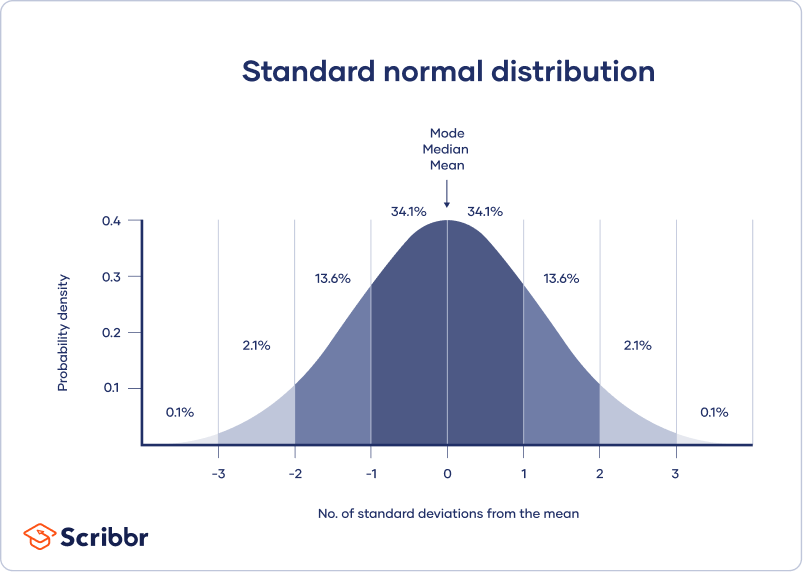


# Visualisations

### Univariate distributions

Let's first check the distribution of sepal_length vs sepal_width and try to see whether they have some kind of correlation

#### With matplotlib

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

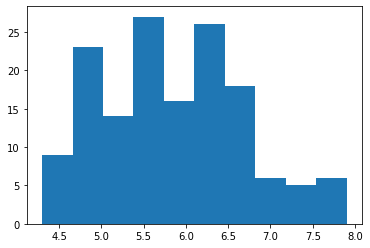

In [ ]:
plt.hist(iris["sepal_length"], bins=10)

Okay now let's add a title and labels to make the graph more beautiful: In python, whether with matplotlib or seaborn, we can build graphs using layers.

Text(0.5, 1.0, 'Distribution of Sepal length of iris flowers across the three species')

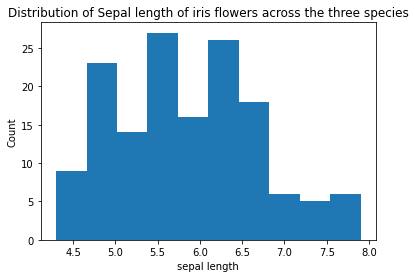

In [ ]:
plt.hist(iris["sepal_length"], bins=10)

plt.xlabel('sepal length')
plt.ylabel('Count')
plt.title("Distribution of Sepal length of iris flowers across the three species")

Let's use matplotlib to plot histogram for each species.

We can see from the histogram below that virginica flowers have relatively larger sepal lengths than other species. So sepal length is a good feature to use in case we would like to build a classifier to discriminate automatically between the three species. However, it is not enough to only use sepal length, because the histograms of versicolor and virginica overlap. So many flowers of both species have similar sepal lengths. We would need other features as well.

But before studying other features, let's try histograms with seaborn. You'll see that seaborn allows us to write less code for similar result.

Text(0.5, 1.0, 'Distribution of Sepal length of iris flowers per each of the three species')

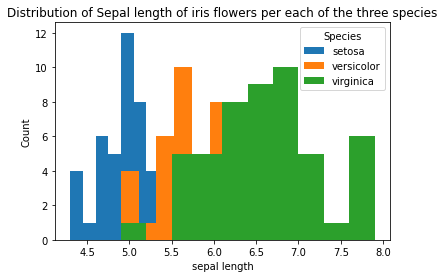

In [ ]:
plt.hist(iris[iris["species"] == "setosa"]["sepal_length"], label='setosa')
plt.hist(iris[iris["species"] == "versicolor"]["sepal_length"], label='versicolor')
plt.hist(iris[iris["species"] == "virginica"]["sepal_length"], label='virginica')
plt.legend(loc='upper right', title='Species')
plt.xlabel('sepal length')
plt.ylabel('Count')
plt.title("Distribution of Sepal length of iris flowers per each of the three species")

#### With seaborn

In [ ]:
# With seaborn

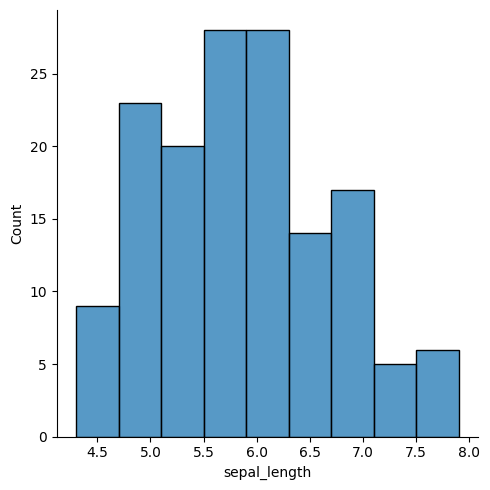

In [ ]:
bins = np.linspace(4.3, 7.9, 10)
sns.displot(data=iris, x="sepal_length", kind="hist", bins=bins)

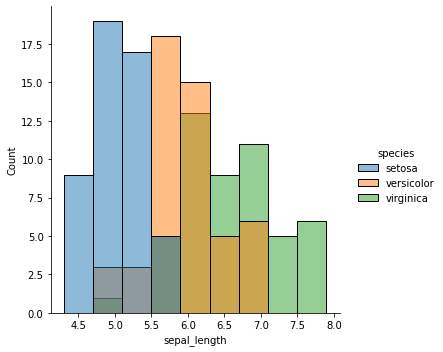

In [ ]:
bins = np.linspace(4.3, 7.9, 10)
sns.displot(data=iris, x="sepal_length", kind="hist", bins=bins, hue="species")

Instead of writing one line of code per species, as with matplotlib, seaborn allows us to get the histograms of the three species with only one line of code using the parameter "hue".

However, histograms are overlapping and difficult to read. Let's try kde instea dof histograms to visualise distribution of the sepal length (we don't need bins for kde). W ecan see with kde that most of the flowers in the iris dataset has a sepal length between 5 and 7, and the central measure is near to 6. We don't see very extreme values.

YOu can compare the following graphs to the table generated with groupby and percentiles and min, max, mean, to understand more how we interpret these visualisations

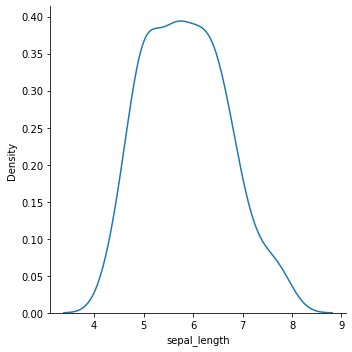

In [ ]:
sns.displot(data=iris, x="sepal_length", kind="kde")

We can also plot kde and histogram on one graph. THere are many parameters you can change in sns.displot. You can check them in the official documentation in seaborn:

https://seaborn.pydata.org/generated/seaborn.displot.html


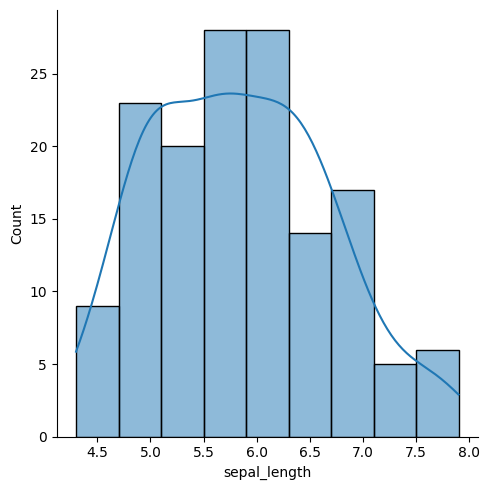

In [ ]:
sns.displot(data=iris, x="sepal_length", kde=True)

NOw, let's plot the kde for the three species on one graph.

I'll also add some lines of code for title, labels, and figure size.

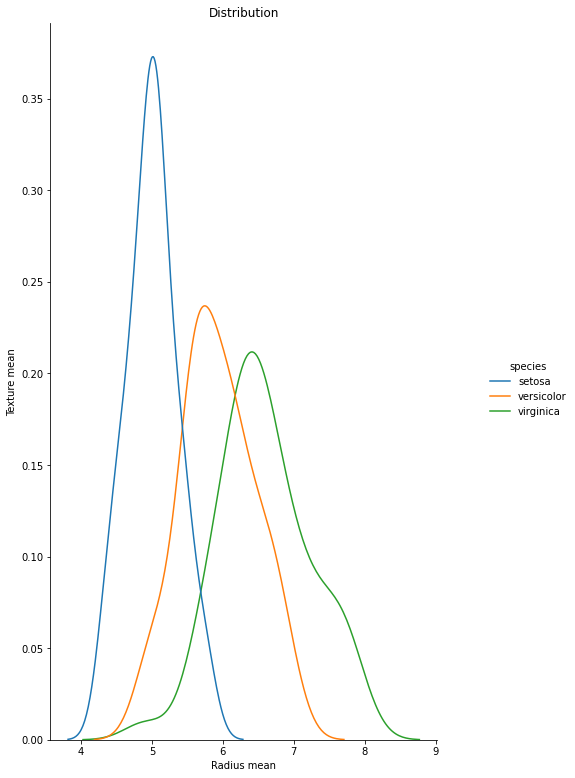

In [ ]:
g=sns.displot(data=iris, x="sepal_length", hue="species", kind="kde")
g.fig.set_figwidth(8.27)
g.fig.set_figheight(11.7)
plt.title("Distribution")
plt.xlabel('Radius mean')
plt.ylabel('Texture mean')
plt.show()

### Checking distribution using boxplot

SO we talked a lot about distributions and anomalies. Let's now use boxplot to visualise percentile and look for anomalies using the 1.5*IQR rule!

Why do we love boxplots and the 1.5 rule? Because we don't know beforehand if the distribution to be normal!

Why 1.5? Let's compare to the normal distribution!

However, we don't have to stick to the 1.5 rule. It really depends on the domain knowledge! But it's a good point to start!


What to do with anomalies? Always review them with the business or process analyst. They might hide interesting information. However, for modeling in later lessons, we will need to treat them so that they won't create a bias, e.g. drop the observation.

You can read more the boxplot here:

https://towardsdatascience.com/boxplot-for-anomaly-detection-9eac783382fd

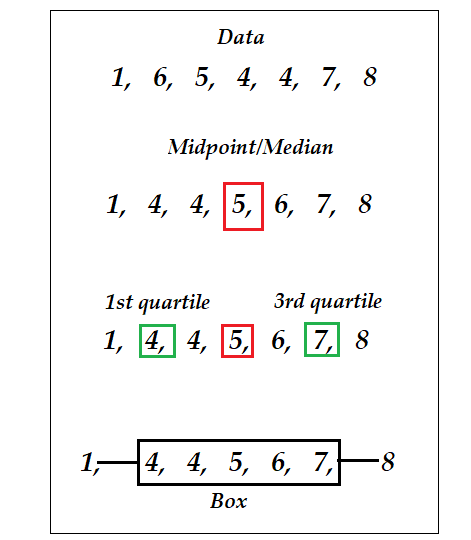





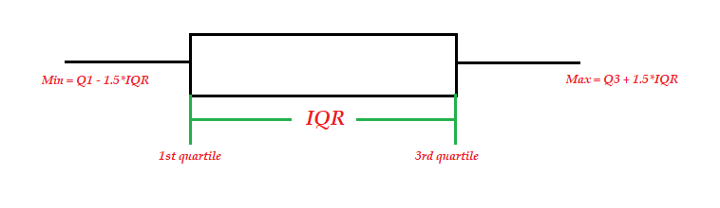

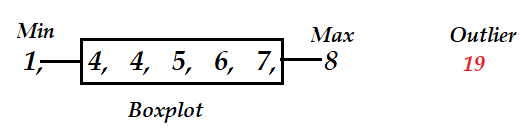

ANd you can read about what we discussed about boxplots and anomaly detection and normal distributions here:

https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21

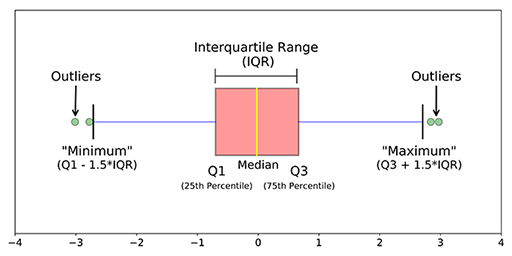



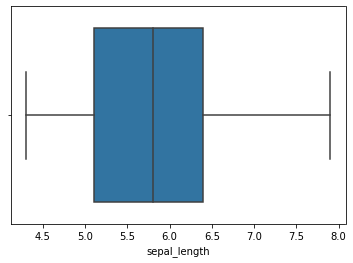

In [ ]:
sns.boxplot(data=iris, x='sepal_length')


When looking at anomalies of sepal length per species, we can see that viriginica has one flower with an extremely small sepal length, compared to other virginica flowers. This is an anomaly and should be removed if we want to build a classifier.

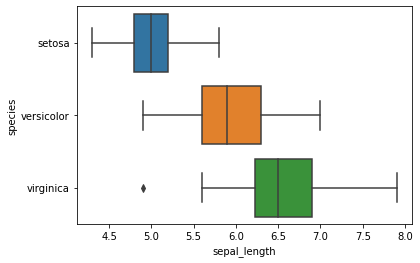

In [ ]:
sns.boxplot(data=iris, x='sepal_length', y="species")

<Axes: xlabel='petal_length', ylabel='species'>

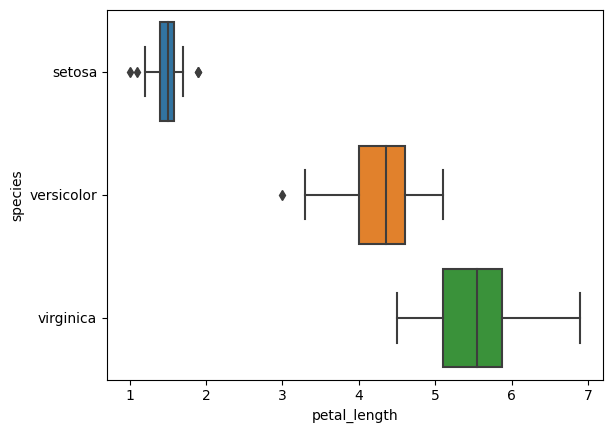

In [ ]:
sns.boxplot(data=iris, x='petal_length', y="species")

When drowing a boxplot, I also like to add a layer with stripplot. In a stripplot, each dot corresponds to one flower. SO I can see the distribution and the individual flowers in the same time!

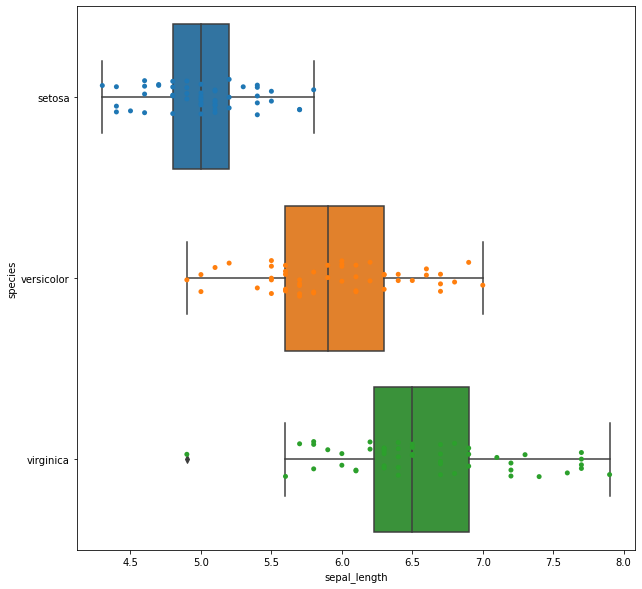

In [ ]:
plt.figure(figsize=(10,10)) # I use figsize to vary the size of the figure
sns.boxplot(data=iris, x='sepal_length', y="species")
sns.stripplot(data=iris, x='sepal_length', y="species")

### Bivariate and univariate distributions with one line!

In addition to analysing the distribution of individual features, you can also visualise the relationship between 2 features.

If two features are highly related to one another, then we can remove one of them because it is redundant. It doesn't add any additional information.

In practice, some models, like the linear regression that we will see later, demands that we have only unrelated features in a certain sense.

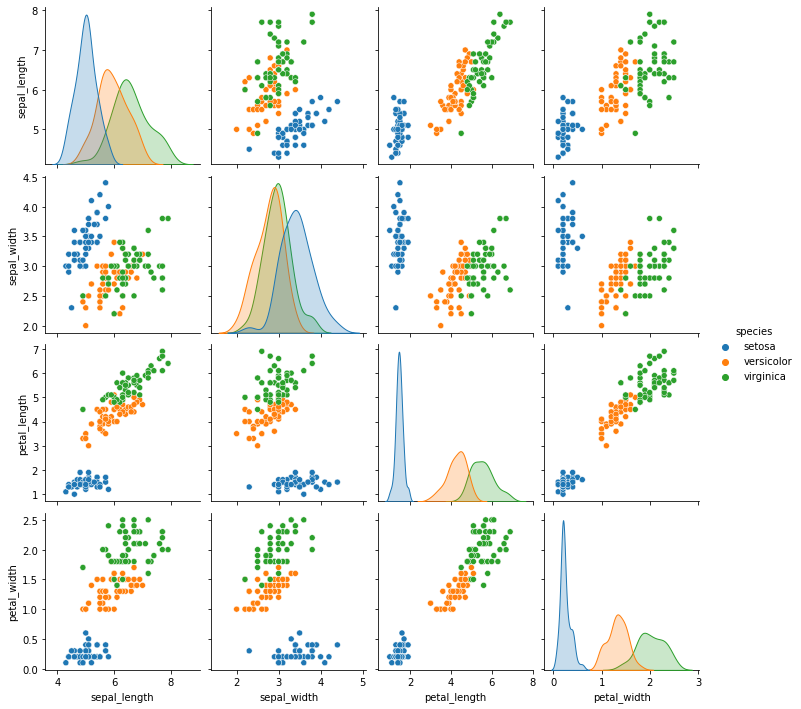

In [ ]:
sns.pairplot(data=iris, hue='species', height=2.5);

We can see that petal_length and petal_width can allow us to discriminate easily between the three species. If we only want to detect the setosa,  it suffices to use these two features!
So let's isolate this plot!

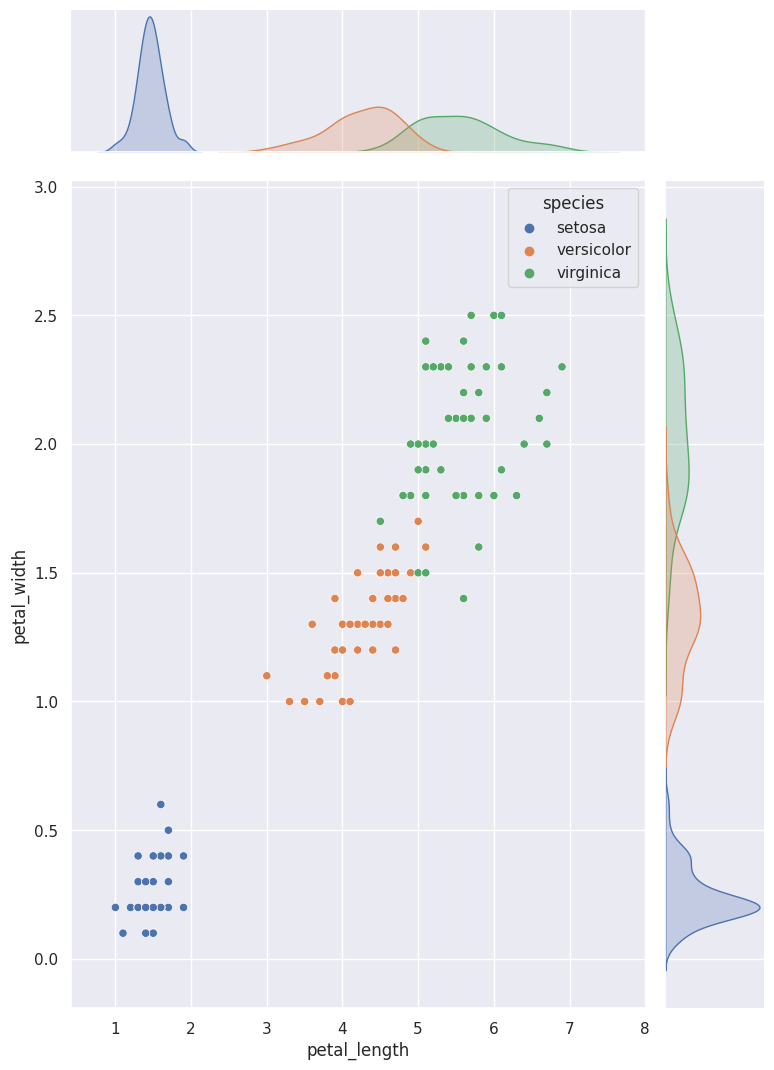

In [ ]:
#sns.set_style("whitegrid")
sns.set(font_scale=1)

g = sns.jointplot(data=iris, x="petal_length", y="petal_width", hue="species") # We can also add kind="reg"
g.fig.set_figwidth(8.27)
g.fig.set_figheight(11.7)
g

### Correlations!


Correlation is a statistical measure that tells us about the association between the two variables. It describes how one variable behaves if there is some change in the other variable.

If the two variables are increasing or decreasing in parallel then they have a positive correlation between them (the perfect correlation value is 1) and if one of the variables is increasing and another one is decreasing then they have a negative correlation with each other (-1). If the change of one variable has no effect on another variable then they have a zero correlation between them.
Both Pearson and Spearman are used for measuring the correlation but the difference between them lies in the kind of analysis we want.

Pearson correlation: Pearson correlation evaluates the linear relationship between two continuous variables.

Spearman correlation: Spearman correlation evaluates the monotonic relationship. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

Kendall: Like Spearman, it is a non-parametric test that measures a monotonic relationship using ranked data. While it can often be used interchangeably with Spearman, Kendall, Kendall is more robust.

In [ ]:
corr = iris.corr(method="pearson") # method{‘pearson’, ‘kendall’, ‘spearman’}
corr.head()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


We can visualise the correlations with a heatmap:

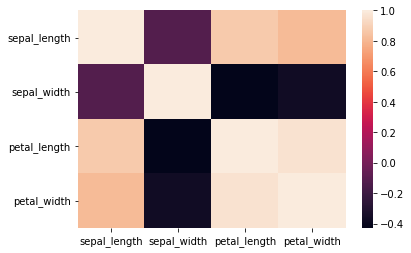

In [ ]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

There ar emany parameters that we can change in sns.heatmap to get a more clear heatmap. You can check these parameters in the official documentation here:

https://seaborn.pydata.org/generated/seaborn.heatmap.html

But here's an example:

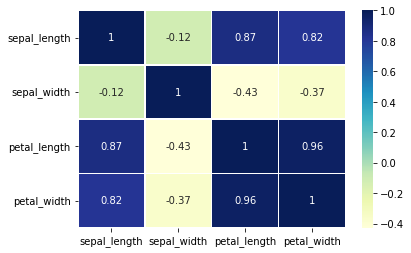

In [ ]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            fmt='.2g',
            linewidths=.5,
            cmap="YlGnBu")


Using the pairplot above, compare the correlation between petal_width and petal_length on the one hand, and petal_width and sepal_width on the other hand. WHat do you notice?